Assessing the relationship between Fertility rate, total (births per woman) and the GDP.


In [19]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
from pandas_datareader.wb import download


YEAR = 2020
frt_indicator = 'SP.DYN.TFRT.IN'
gdp_indicator = 'NY.GDP.PCAP.PP.CD'

frt = download(indicator=frt_indicator, country='all', start=YEAR, end=YEAR)[49:].dropna().reset_index()
gdp = download(indicator=gdp_indicator, country='all', start=YEAR, end=YEAR)[49:].dropna().reset_index()

frt.head()

,country,year,SP.DYN.TFRT.IN
0,Afghanistan,2020,4.176
1,Albania,2020,1.580
2,Algeria,2020,2.942
3,Angola,2020,5.371
4,Antigua and Barbuda,2020,1.978


Rounding off GDP to the nearest million, and the population to the nearest thousand.

In [23]:
def roundToThousands(g_d_p):
    return round(g_d_p/1000)

GDP = 'GDP in $m'
COUNTRY = 'country'

gdp[GDP] = gdp[gdp_indicator].apply(roundToThousands)
gdpClean = gdp[[COUNTRY, GDP]]

gdpClean.head()

,country,GDP in $m
0,Afghanistan,2
1,Albania,14
2,Algeria,11
3,Angola,7
4,Antigua and Barbuda,19


In [33]:
def roundTodecimals(fertility):
    return round(fertility/0.1)

FRT = 'Fertility (0.1s)'

frt[FRT] = frt[frt_indicator].apply(roundTodecimals)
frtClean = frt[[COUNTRY, FRT]]

frtClean.head()

,country,Fertility (0.1s)
0,Afghanistan,42
1,Albania,16
2,Algeria,29
3,Angola,54
4,Antigua and Barbuda,20


Combining the data

In [37]:
gdpVsfrt = pd.merge(gdpClean, frtClean, on=COUNTRY, how='inner')
gdpVsfrt.head()

,country,GDP in $m,Fertility (0.1s)
0,Afghanistan,2,42
1,Albania,14,16
2,Algeria,11,29
3,Angola,7,54
4,Antigua and Barbuda,19,20


Calculating the correlation

In [38]:
from scipy.stats import spearmanr

gdpColumn = gdpVsfrt[GDP]
frtColumn = gdpVsfrt[FRT]
(correlation, pValue) = spearmanr(gdpColumn, frtColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is -0.8204265213163567
It is statistically significant.


Showing the Data

<AxesSubplot:xlabel='GDP in $m', ylabel='Fertility (0.1s)'>

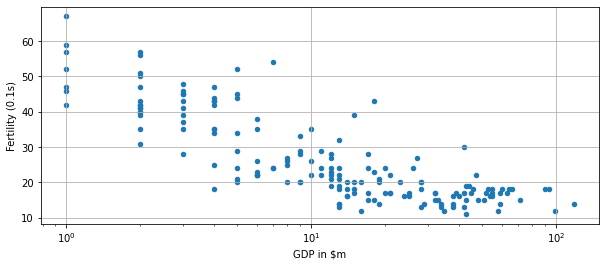

In [39]:
%matplotlib inline
gdpVsfrt.plot(x=GDP, y=FRT, kind='scatter', grid=True, logx=True, figsize=(10, 4))

In [41]:
gdpVsfrt.sort_values(GDP).head(10)

,country,GDP in $m,Fertility (0.1s)
31,Central African Republic,1,46
140,Somalia,1,59
37,"Congo, Dem. Rep.",1,57
115,Niger,1,67
108,Mozambique,1,47
26,Burundi,1,52
91,Liberia,1,42
0,Afghanistan,2,42
32,Chad,2,56
53,Ethiopia,2,40


In [43]:
gdpVsfrt.sort_values(FRT).head(10)

,country,GDP in $m,Fertility (0.1s)
85,"Korea, Rep.",43,11
126,Puerto Rico,35,12
136,Singapore,99,12
95,"Macao SAR, China",58,12
20,Bosnia and Herzegovina,16,12
62,Greece,28,13
104,Moldova,13,13
79,Italy,42,13
42,Cyprus,38,13
125,Portugal,34,13


In [ ]:
There is a negative correlation between the Fertiltiy rate and the country's GDP.

As the GDP increases, the  Fertiltiy rate reduces.

This could be because a higher GDP indicateds the ability of access to family planning tools.

